<a href="https://colab.research.google.com/github/gauris26/Machine-Learning/blob/main/mcdonald_clustering_by_geo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [ ]:
mcdonalds = pd.read_csv('/kaggle/input/mcdonalds-store-reviews/McDonald_s_Reviews.csv',encoding='iso-8859-1')

In [ ]:
mcdonalds.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [ ]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [1]:
mcdonalds.describe()

NameError: name 'mcdonalds' is not defined

In [ ]:
mcdonalds.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [ ]:
mcdonalds['latitude'] = mcdonalds['latitude ']
mcdonalds.drop('latitude ', axis=1, inplace=True)
mcdonalds.drop(['store_name','reviewer_id','store_address','category','review_time','review'],inplace=True, axis=1)
mcdonalds.dropna(inplace=True)
mcdonalds.drop_duplicates()
mcdonalds['rating'] = mcdonalds['rating'].str.replace(r'\D', '', regex=True)
mcdonalds['rating'] = mcdonalds['rating'].astype(int)
mcdonalds['rating_count'] = mcdonalds['rating_count'].str.replace(r'\D', '', regex=True)
mcdonalds['rating_count'] = mcdonalds['rating_count'].astype(int)

In [ ]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32736 entries, 0 to 33395
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitude     32736 non-null  float64
 1   rating_count  32736 non-null  int64  
 2   rating        32736 non-null  int64  
 3   latitude      32736 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.2 MB


In [ ]:
mcdonalds.sample(5)

,longitude,rating_count,rating,latitude
16138,-97.660629,1406,5,30.329135
5379,-117.178011,550,5,32.820654
12619,-118.282955,2722,1,33.931261
9085,-111.897383,3243,3,40.759057
15296,-87.777913,1454,5,41.879656


In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(mcdonalds[['rating_count','rating']])
mcdonalds['rating_count'] = scaled[:,0]
mcdonalds['rating'] = scaled[:,1]

In [ ]:
mcdonalds['rating'].value_counts()

rating
1.00    10059
0.00     9305
0.75     5646
0.50     4706
0.25     3020
Name: count, dtype: int64

In [ ]:
mcdonalds['rating_count'].value_counts()

rating_count
0.131160    1140
0.099387    1140
0.092126    1140
0.072455    1140
0.123333    1140
0.268036    1140
0.069777    1140
0.066996    1100
0.108245    1030
0.039394    1028
0.037850     998
0.078892     960
0.273135     950
0.034502     943
0.058860     926
0.153458     890
0.187394     870
0.035738     850
0.050312     800
0.066893     800
0.273083     770
0.061332     751
0.078840     750
0.267933     750
0.082291     710
0.051805     680
0.046140     680
0.061641     635
0.053710     610
0.017097     602
0.160513     590
0.239920     570
0.069726     560
0.121067     550
0.014779     550
0.123281     510
0.126629     481
0.999434     460
0.131057     430
0.151038     270
0.160564     230
0.067048     190
0.037901     170
0.000000      60
1.000000      30
0.053762      10
0.107369       3
0.102374       3
0.065863       3
0.253515       3
Name: count, dtype: int64

In [ ]:
#mcdonalds = np.array(mcdonalds[['latitude','longitude', 'rating_count', 'rating']])
array_mcdonalds = np.array(mcdonalds[['rating_count','rating']])
array_mcdonalds

array([[0.05031155, 0.        ],
       [0.05031155, 0.75      ],
       [0.05031155, 0.        ],
       ...,
       [0.1311602 , 0.75      ],
       [0.1311602 , 1.        ],
       [0.1311602 , 1.        ]])

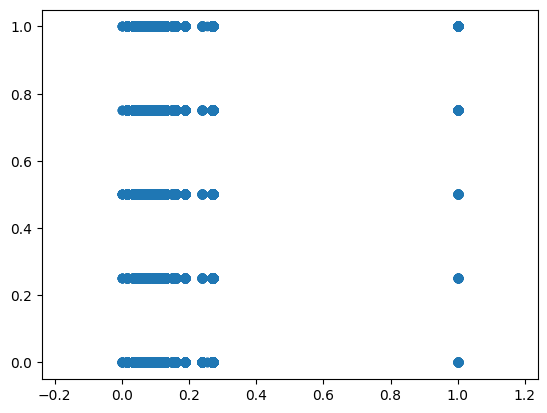

Relacion de : -0.051112891663297556


In [ ]:
X = array_mcdonalds[:,0]
y = array_mcdonalds[:,1]

plt.scatter(X, y)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(X, y)

# Display the correlation
print("Relacion de :",correlation)

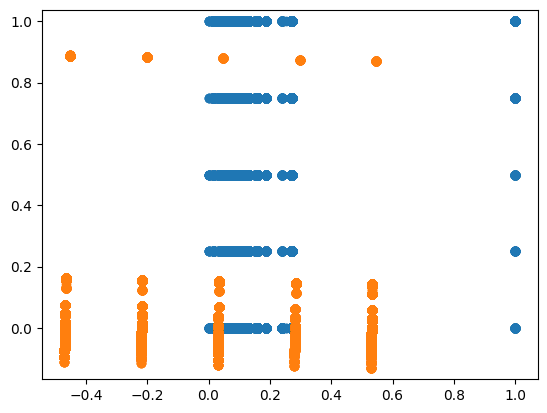

Display the correlation:  6.158268339717665e-17


In [ ]:
plt.scatter(array_mcdonalds[:,0], array_mcdonalds[:,1])

model = PCA()

pca_features = model.fit_transform(array_mcdonalds)

xs = pca_features[:,0]
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print("Display the correlation: ",correlation)

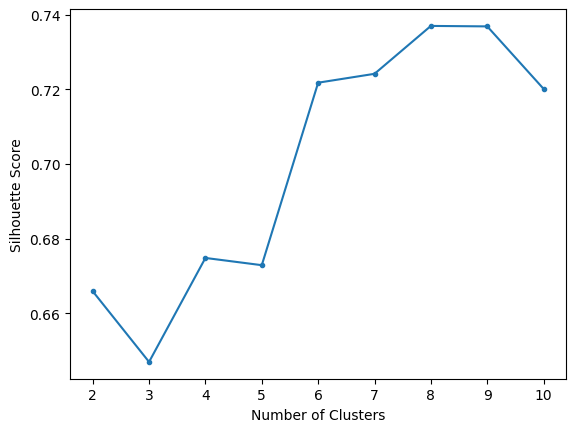

In [ ]:
silhouette_scores_list = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i,n_init=10, max_iter=300)
  kmeans.fit(pca_features)
  silhouette_scores_list.append(silhouette_score(pca_features, kmeans.labels_))
plt.plot(range(2, 11), silhouette_scores_list, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

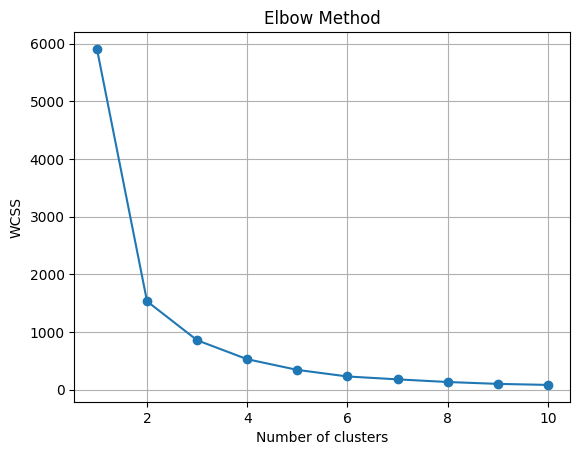

In [ ]:
wcss = []
for i in range(1, 11):  # Probamos de 1 a 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42,n_init=10, max_iter=3000)
    kmeans.fit(pca_features)
    wcss.append(kmeans.inertia_)  # Inertia es el WCSS

# Graficar los resultados
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=42,n_init=10, max_iter=3000)
kmeans.fit_predict(pca_features)
labels = kmeans.labels_
mcdonalds['cluster'] = labels

In [ ]:
mcdonalds.head()

,longitude,rating_count,rating,latitude,cluster
0,-97.792874,0.050312,0.00,30.460718,6
1,-97.792874,0.050312,0.75,30.460718,3
2,-97.792874,0.050312,0.00,30.460718,6
3,-97.792874,0.050312,1.00,30.460718,1
4,-97.792874,0.050312,0.00,30.460718,6


In [ ]:
mcdonalds['cluster'].value_counts()

cluster
1    9858
6    7168
3    5531
2    4640
5    2984
0    2065
4     316
7     174
Name: count, dtype: int64

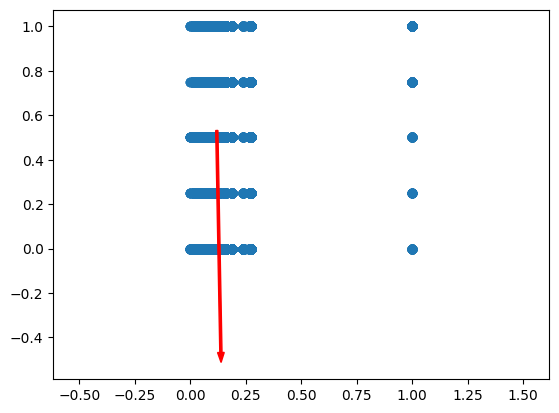

In [ ]:
plt.scatter(array_mcdonalds[:,0], array_mcdonalds[:,1])
# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(array_mcdonalds)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.cluster import KMeans